<a href="https://colab.research.google.com/github/SKFazleeRabby/Machine-Learning-with-Python-A-Practical-Introduction/blob/master/linear-regression/prediction_of_co2_emissions_of_car_using_polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Prediction of CO2 Emissions of Car using Polynomial Linear Regression**<center>

<center>In this notebook, we will use scikit-learn to predict CO2 emissions using Polynomial linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value. </center>


###**Importing Datasset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading Dataset from IBM Object Storage**
We have downloaded a fuel consumption dataset FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

###**Reading and Exploring Data**

In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


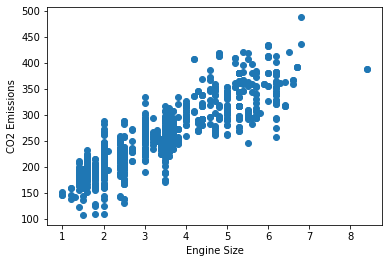

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

###**Creating Train and Test Set using Numpy**

In [10]:
mask = np.random.rand(len(cdf)) < 0.8
train_set = cdf[mask]
test_set = cdf[~mask]
print("Number of Training Data: ", train_set.shape[0])
print("Number of Testing Data: ", test_set.shape[0])

Number of Training Data:  866
Number of Testing Data:  201


###**Fitting Model into Our Data using Polynomial Regression**
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods.

Polynomial Regression is the relationship between the independent variable $x$ and the dependent variable $y$ that is modeled as an $n^{th}$ degree polynomial in $x$. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: $1$, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_X = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])

test_X = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])

polynomial = PolynomialFeatures(degree=2)
train_X_poly = polynomial.fit_transform(train_X)

regressor = LinearRegression()
regressor.fit(train_X_poly, train_y)
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  [109.86708049]
Coefficient:  [[ 0.         48.99529913 -1.35103209]]


###**Visualizing The Regression Line**

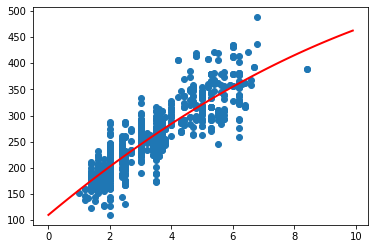

In [33]:
plt.scatter(train_X, train_y)
x_axis = np.arange(0.0,10.0,0.1)
y_axis = regressor.intercept_[0] + regressor.coef_[0][1]*x_axis +regressor.coef_[0][2] * (x_axis**2)
plt.plot(x_axis, y_axis, color='red', linewidth=2)
plt.show()

###**Model Evaluation**


In [34]:
from sklearn.metrics import r2_score

test_X_poly = polynomial.fit_transform(test_X)
predicted_y = regressor.predict(test_X_poly)

print("Mean Squared Error/Residual Sum of Squares (MSE): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2 Score: %.2f" % r2_score(predicted_y, test_y))
print("Variance Score: %.2f" % regressor.score(test_X_poly, test_y))

Mean Squared Error/Residual Sum of Squares (MSE): 910.94
R2 Score: 0.68
Variance Score: 0.77


###**Modify Current Model**
Let's build a model with same same features but this time with **degree 3**. Let's find out if it gives a better model or not.

In [35]:
poly_3 = PolynomialFeatures(degree=3)
train_X_poly_3 = poly_3.fit_transform(train_X)
new_regressor = LinearRegression()
new_regressor.fit(train_X_poly_3, train_y)
print("Intercept: ", new_regressor.intercept_)
print("Coefficient: ", new_regressor.coef_)

Intercept:  [130.52251646]
Coefficient:  [[ 0.         29.67254678  3.93859607 -0.43604948]]


###**Visualizing New Regresion Model**

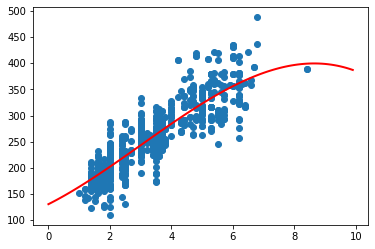

In [40]:
plt.scatter(train_X, train_y)
new_y_axis = new_regressor.intercept_[0] + new_regressor.coef_[0][1] * x_axis + new_regressor.coef_[0][2] * (x_axis**2) + new_regressor.coef_[0][3] * (x_axis**3)
plt.plot(x_axis, new_y_axis, color='red', linewidth=2)
plt.show()

###**Comparing Result**

In [43]:
test_X_poly_3 = poly_3.fit_transform(test_X)
predicted_y = new_regressor.predict(test_X_poly_3)

print("Residual Sum of Squares/Mean Squared Error (MSE): %.2f" % np.mean((predicted_y - test_y)**2))
print("R2 Score: %.2f" % r2_score(predicted_y, test_y))
print("Variance Score: %.2f" % new_regressor.score(test_X_poly_3, test_y))

Residual Sum of Squares/Mean Squared Error (MSE): 905.90
R2 Score: 0.68
Variance Score: 0.77


##**<center>Thank You for Your Patience</center>**